# **Introduction**
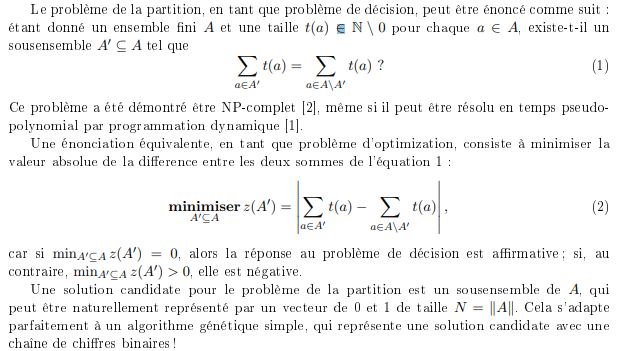





In [295]:
##Importation
import random

#Déclaration des variables globales et constantes

MAXGEN = 100 # Nombre maximum de generations
POPSIZE = 100  # La taille de la population
N = 20 # la longueur d'un genome
PMUT = 0.01 # probabilite d'une mutation
PX = 0.6 # probabilite d'une recombination


def fitness(ind):
  return sum(ind)

def selection(pop):
  f = [fitness(pop[i]) for i in range(len(pop))]
  cum = f.copy()
  for i in range(1,len(cum)):
    cum[i] += cum[i - 1]
  offspring = []
  for count in range(len(pop)):
    r = random.randrange(cum[-1])
    i = 0
    while cum[i] < r:
      i += 1
    offspring.append(pop[i].copy())
  return offspring

def mutation(ind):
  for i in range(len(ind)):
    if random.random()<PMUT:
      ind[i] = 1 - ind[i]

def crossover(mom, dad):
  point = random.randrange(len(mom))
  tmp = mom[point:]
  mom[point:] = dad[point:]
  dad[point:] = tmp

In [296]:
# Initialisation :

random.seed()
pop = []
for i in range(POPSIZE):
  ind = []
  for j in range(N):
    ind.append(random.choice([0, 1]))
  pop.append(ind)

print("Initial Population:")
for i in range(POPSIZE):
  print(pop[i])

for g in range(MAXGEN):
  pop = selection(pop)

  for ind in pop:
    mutation(ind)

  for i in range(0,POPSIZE,2):
    if random.random() < PX:
      crossover(pop[i],pop[i + 1])

  f = [fitness(pop[i]) for i in range(len(pop))]
  print("Generation", g, "cumulative fitness:", sum(f))
  if max(f) == N:
   print("Solution found.")
   break

print("Generation", g)
for i in range(POPSIZE):
  print(pop[i])

Initial Population:
[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
[1, 

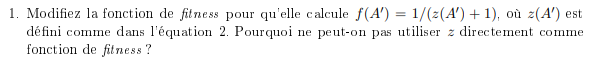

On ne peut pas utiliser z directement sans le reste de l'équation car le z va seulement nous donner l'ecart entre les 2 ensembles et sans le "+1" c'est impossible car on n'a pas le droit d'avoir un denominateur égale a zero.

In [286]:
##Ici je crée un sous ensemble de manière aléatoire
# Je décide de créer une chaine de bit de la même longueur que la population et 
# en fonction de la valeur du bit (donc si il est egal a 1 ou non), je l'ajoute on non
# au sous ensemble

##Je commence par faire ma chaine de bit de manière aléatoire
def randombit(A):
  randombit = []
  for i in range(len(A)):
    randombit.append(random.randint(0, 1))
  return randombit

## En fonction de la chaine de bit généré je crée mes deux sous ensembles
def createsubsetalea(A) :
  ranbit = randombit(A)
  print("Random bit :",ranbit)
  print("Somme des 1 dans randombit :", sum(ranbit))
  A1 = []
  A2 = []
  for i in range(len(ranbit)):
    if ranbit[i]== 1 :
      A1.append(A[i])
    else :
      A2.append(A[i])
  return A1,A2

In [287]:
##Ici je decide de créer des sous ensembles de manière plus intelligente avec un algorithme plus
##elaboré.
## Je vais trier les chaines par ordre décroissant (en fonction de l'aur nombre de 1 )puis de l'ajouter un par un dans 
##l'ensemble ayant la plus petite somme de 1

##Donc ici je crée un liste a 2 dimension qui comporte les individus
## et la somme de 1 pour chaque individus
def subsort(bigset):
  A = []
  for i in range (len(bigset)):
    A.append(sum(bigset[i]))
  liste = [list(i) for i in zip(A, bigset)]
  return liste

##A partir de la liste a 2 dimension, je vais créer les 2 sous ensembles comme expliqué plus haut
def createsubset(bigset):
  A1 = []
  A2 = []
  A12 = []
  A22 = []
  A = subsort(bigset)
  A = sorted(A,key=lambda l:l[0], reverse=True)
  for i in range(len(A)):
    if sum(A12) < sum(A22):
      A1.append(A[i][1])
      A12.append(A[i][0])
    else :
      A2.append(A[i][1])
      A22.append(A[i][0])
  return A1,A2


In [288]:
def fitness2(subset):
  A1 = subset[0]
  A2 = subset[1]
  print("longeur de A1 :",len(A1))
  ##print("la longueur de A2 doit etre égale a len(pop) - len(A1) donc : ", len(pop) - len(A1))
  print("Longeur de A2 : ", len(A2))
  print("Longueur de pop :", len(pop))
  
  cum = 0
  cum1 = 0
  cum2 = 0

  for i in range(len(pop)):
    cum = cum + sum(pop[i])

  for i in range(len(A1)):
    cum1 = cum1 + sum(A1[i])

  for i in range(len(A2)):
    cum2 = cum2 + sum(A2[i])

  print("Somme des 1 de pop : ", cum)
  ##print("Somme des 1 supposée de A2 :", cum-cum1 )  
  print("Somme des 1 de A1 : ", cum1)
  print("Somme des 1 de A2 : ", cum2)

  z = abs(cum1-cum2)
  res = 1 /(z + 1)
  print("Resultat du calcule de f(A') : ", res)
  return res

Je teste les 2 méthodes :

In [312]:
##Methode aléatoire qui créer 2 sous ensembles aleatoire issue de la population
subset = createsubsetalea(pop)
res = fitness2(subset)

Random bit : [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]
Somme des 1 dans randombit : 49
longeur de A1 : 49
Longeur de A2 :  51
Longueur de pop : 100
Somme des 1 de pop :  1710
Somme des 1 de A1 :  832
Somme des 1 de A2 :  878
Resultat du calcule de f(A') :  0.02127659574468085


In [314]:
## Algorithme plus élaboré, qui va créer 2 sous ensemble de la population et ça de manière plus équitable
subset = createsubset(pop)
res = fitness2(subset)
##On peut voir que cette version est plus efficace

longeur de A1 : 50
Longeur de A2 :  50
Longueur de pop : 100
Somme des 1 de pop :  1710
Somme des 1 de A1 :  855
Somme des 1 de A2 :  855
Resultat du calcule de f(A') :  1.0


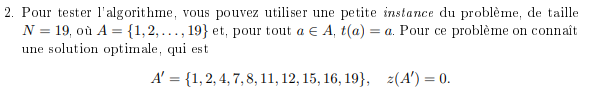

J'adapte mon algorithme en fonction du format du test en suivant la meme logique
(car j'utlise des listes de listes dans la question précédente, alors qu'ici ce sont des listes de int

In [291]:
def createsubsettest(bigset):
  A1 = []
  A2 = []
  A = bigset
  A = sorted(A, reverse=True)

  for i in range(len(A)):
    if sum(A1) < sum(A2):
      A1.append(A[i])
    else :
      A2.append(A[i])

  return A1,A2


In [292]:
def fitness2test(subset):
  A1 = subset[0]
  A2 = subset[1]
  print("Longeur de A1 :",len(A1))
  print("Longeur de A2 : ", len(A2))
  print("A1 : ",A1)
  print("A2 : ",A2)
  cum1 = sum(A1)
  cum2 = sum(A2)

  
  print("Somme des 1 de A1 : ", cum1)
  print("Somme des 1 de A2 : ", cum2)

  z = abs(cum1-cum2)
  res = 1 /(z + 1)
  print("Resultat du calcule de f(A') : ", res)
  return res

In [293]:
testA = list(range(1,20))
testA
subsettest = createsubsettest(testA)
restest = fitness2test(subsettest)

Longeur de A1 : 10
Longeur de A2 :  9
A1 :  [18, 17, 14, 13, 10, 9, 6, 5, 2, 1]
A2 :  [19, 16, 15, 12, 11, 8, 7, 4, 3]
Somme des 1 de A1 :  95
Somme des 1 de A2 :  95
Resultat du calcule de f(A') :  1.0


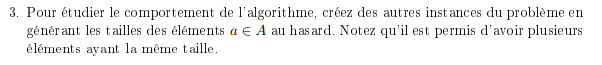

In [315]:
testB = list(range(1,random.randint(5,30)))
testB
subsettestB = createsubsettest(testB)
restestB = fitness2test(subsettestB)

Longeur de A1 : 6
Longeur de A2 :  6
A1 :  [11, 10, 7, 6, 3, 2]
A2 :  [12, 9, 8, 5, 4, 1]
Somme des 1 de A1 :  39
Somme des 1 de A2 :  39
Resultat du calcule de f(A') :  1.0


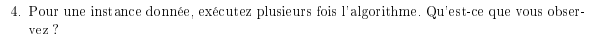

J'observe que parfois le resultat de la fitness est égale a 1 donc qu'on accomplit l'objectif et que parfois non
Tout depend de est-ce que oui ou non il ets possible de diviser équitablement un ensemble en sous ensemble égaux.